In [1]:
#импорт библиотек
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os  

In [2]:
#variables
data='brl'

#импорт данных, сделать циклом
data = pd.read_csv(data+'/all_data.csv', sep=',')


In [3]:
#конвертация данных
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)


In [4]:
data

,Date,USDBRL Curncy,BCN1W BGN Curncy,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,2.1004,25.00,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,2.1043,25.00,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,2.0933,25.00,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,2.0859,25.00,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,2.0925,25.00,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,2021-12-27,5.6316,59.00,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,5.6275,39.26,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,5.6932,68.23,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0
3890,2021-12-30,5.5697,78.02,1.1325,1.3499,115.08,20.4626,0.7307,1.3177,79.32,...,95.968,205.000,90.500,5.4900,779.75,596.00,228.85,2.4431,2.6129,20.0


In [5]:
drop_data = data.copy()

In [6]:
#удаление пустых строчек
drop_data = drop_data.dropna(how='all')

In [7]:
#удаление пропусков спота из-за выходных и праздников
drop_data = drop_data.dropna(subset=['USDBRL Curncy'])


In [8]:
#добавление предыдущих значений признаков в пустые места
for col in drop_data.select_dtypes(include=['int', 'float']):
    while drop_data[col].isnull().any(): 
        drop_data[col] = drop_data[col].fillna(method='ffill')


In [9]:
#вычисление изменения цены

drop_data['devprice'] = (drop_data['USDBRL Curncy'].shift(-1) - (drop_data['USDBRL Curncy'] + (drop_data['BCN1W BGN Curncy'] / 50000))) / drop_data['USDBRL Curncy'].shift(-1)

#перенос последнего столбца на 4-тое место
new_columns = drop_data.columns[:-1].to_list()
new_columns.insert(1, 'devprice')
t_data_0 = drop_data[new_columns]
#удаление 'USDBRL Curncy' и 'BCN1W BGN Curncy' 
t_data = t_data_0.copy()
t_data.drop(['USDBRL Curncy', 'BCN1W BGN Curncy'], axis=1, inplace=True)
t_data.drop(t_data.tail(1).index, inplace=True)

In [10]:
t_data

,Date,devprice,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,0.001616,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,55040.0,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,-0.005494,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,54240.0,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,-0.003787,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,52360.0,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,0.002915,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,52570.0,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,-0.000048,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,53540.0,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,2021-12-23,-0.008289,1.1327,1.3408,114.39,20.6433,0.7190,1.3076,76.85,69820.0,...,96.019,212.000,93.500,5.3325,814.75,605.75,231.20,2.3405,2.4952,23.9
3887,2021-12-27,-0.000938,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,69630.0,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,0.011402,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,70220.0,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,-0.022419,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,70050.0,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0


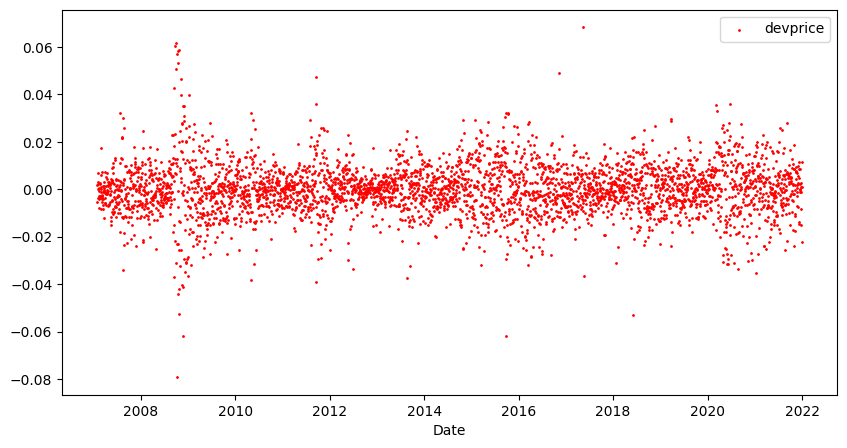

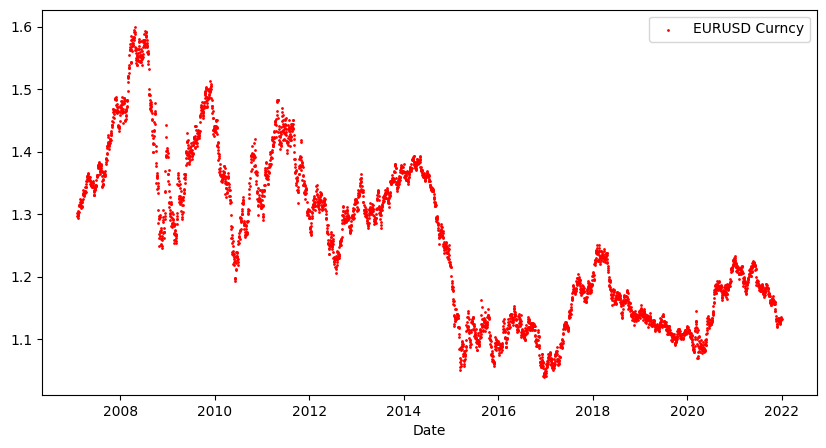

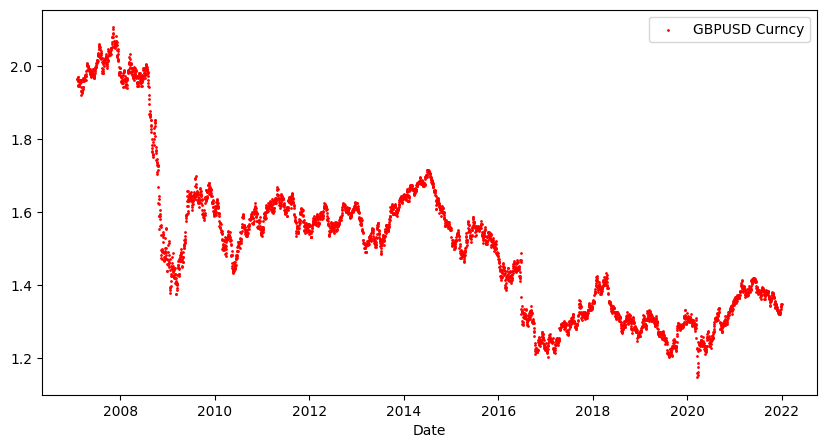

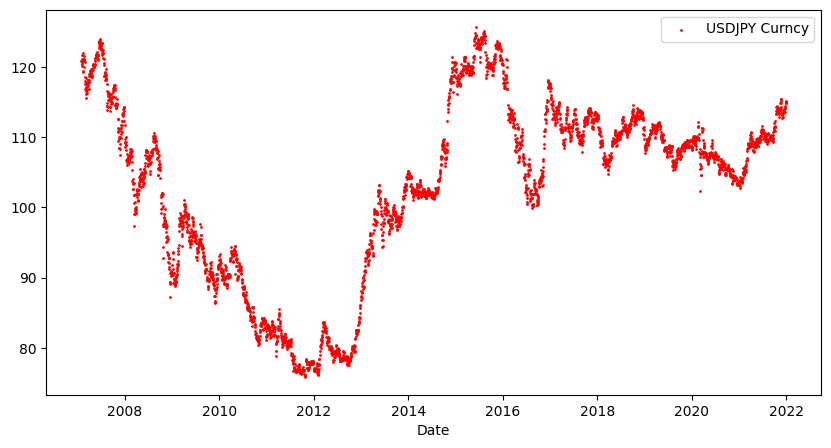

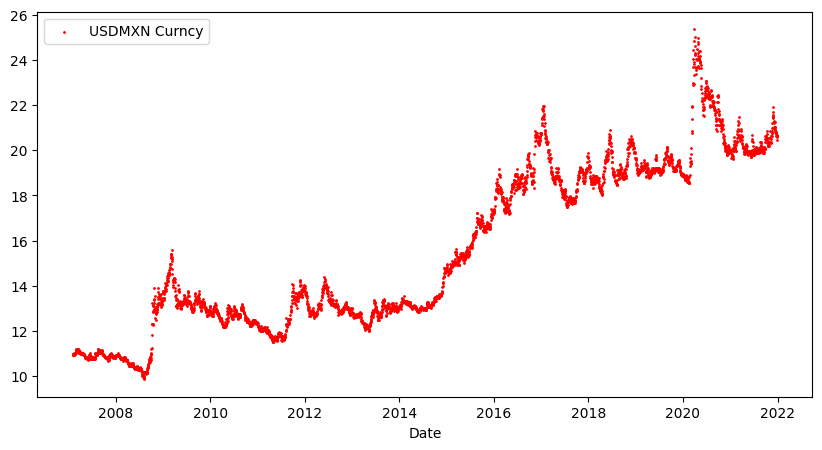

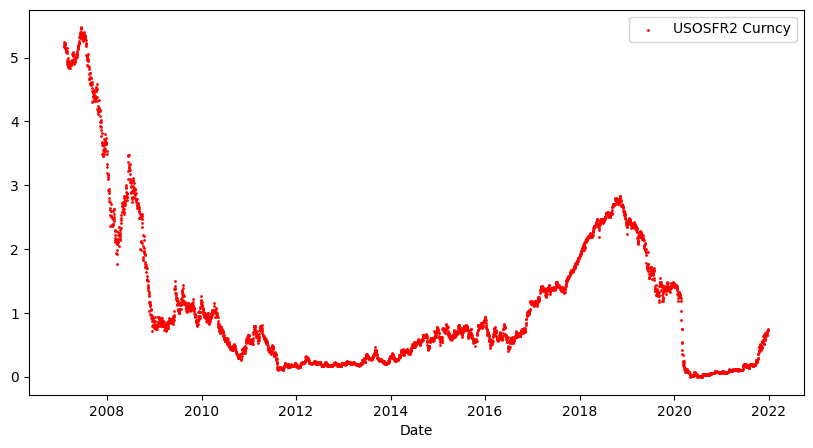

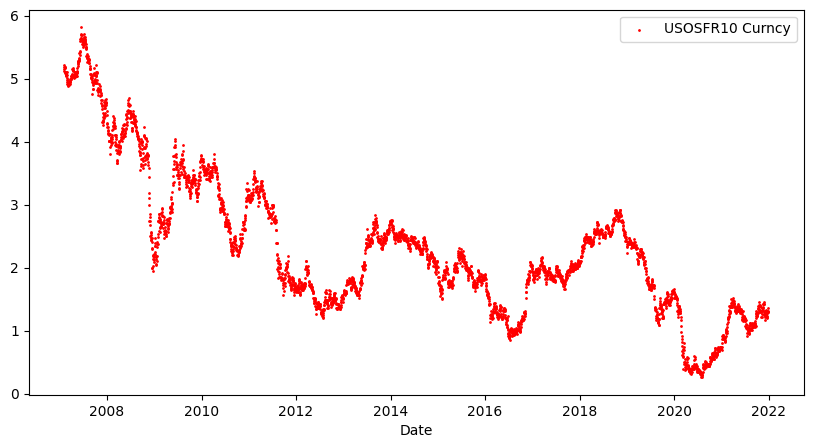

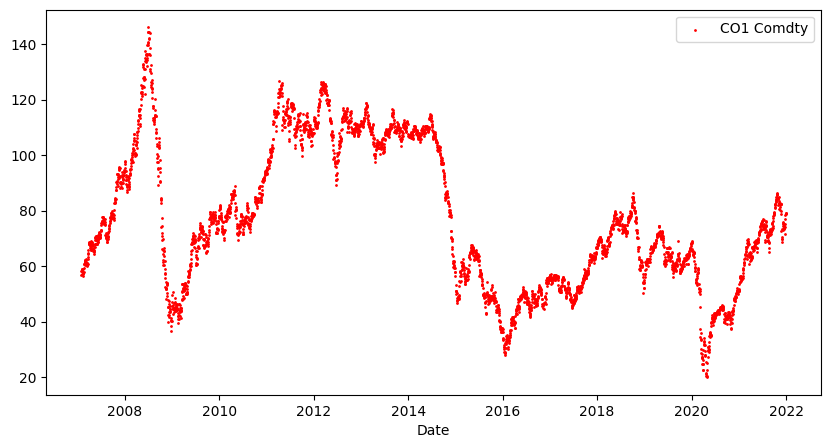

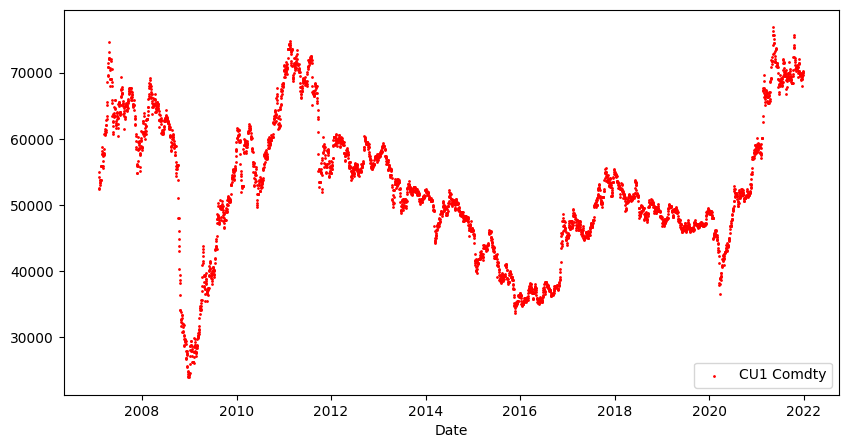

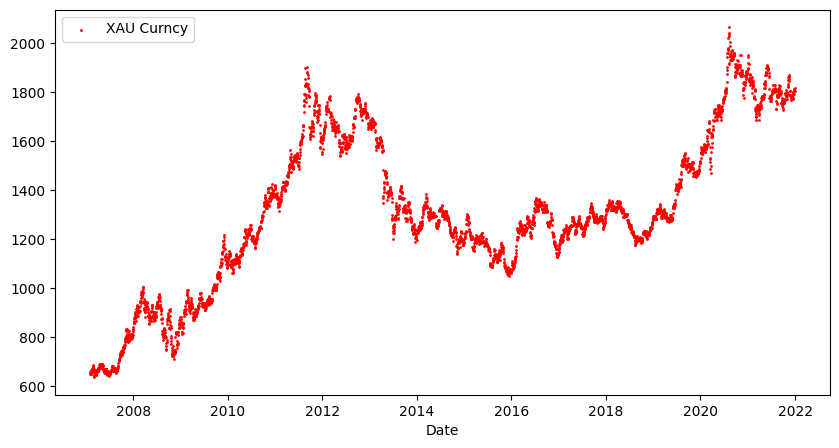

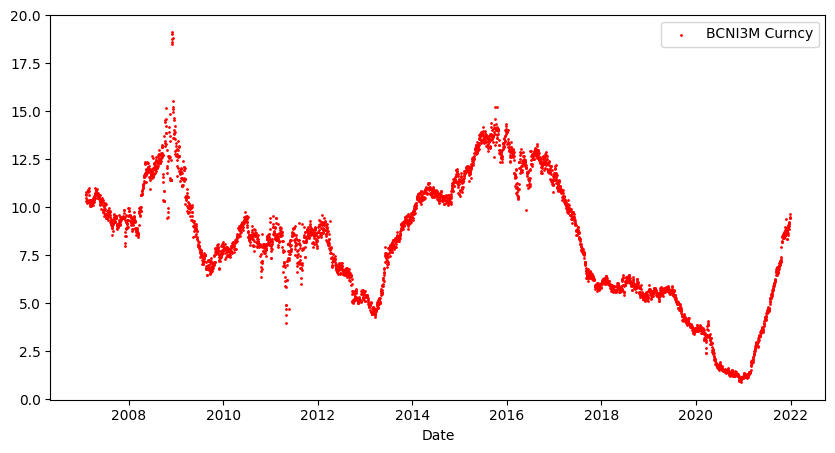

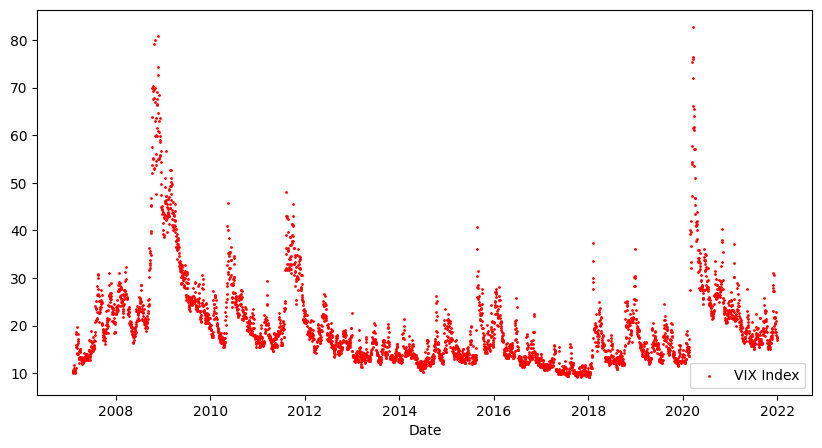

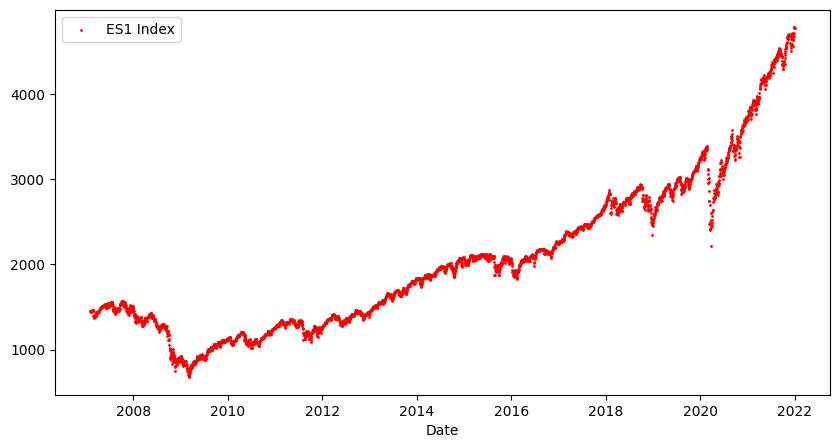

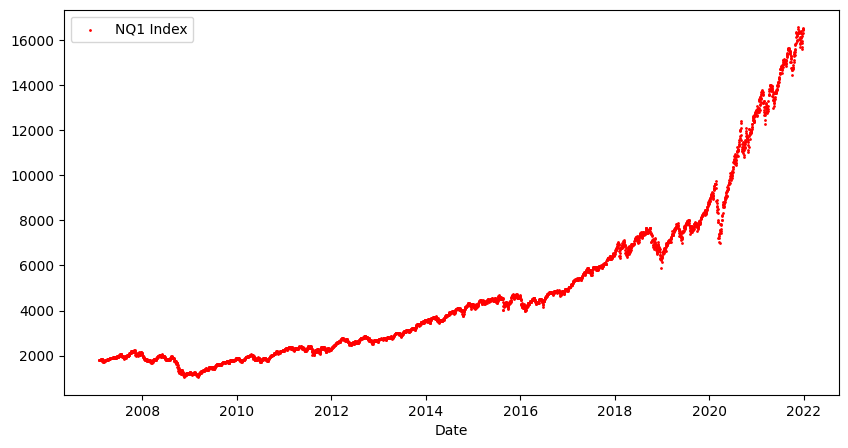

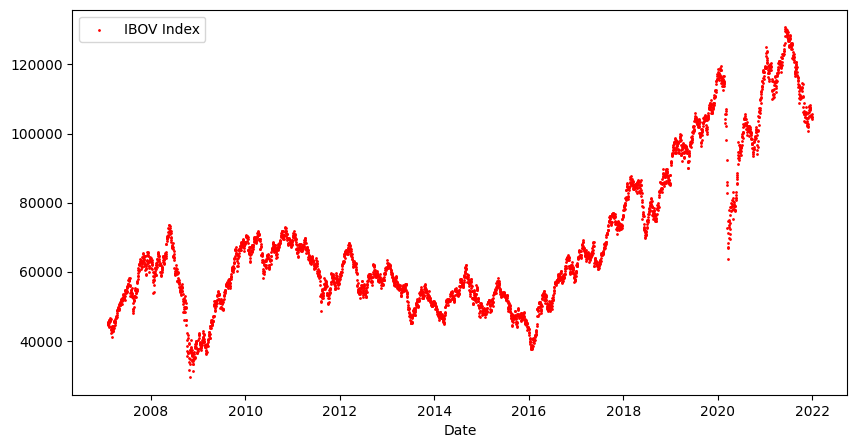

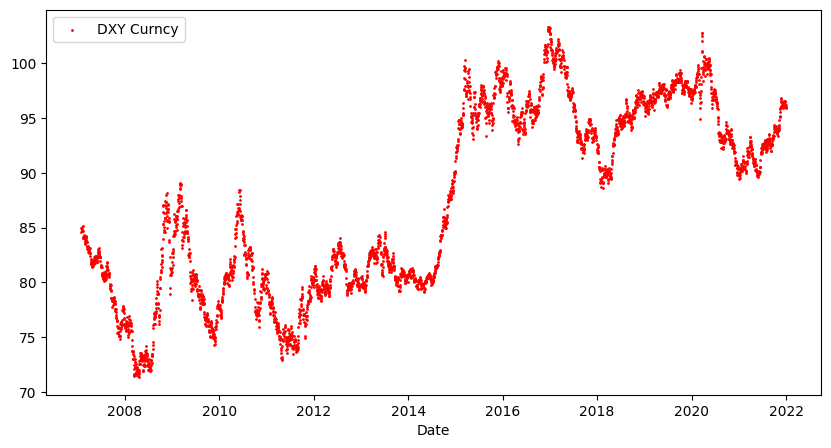

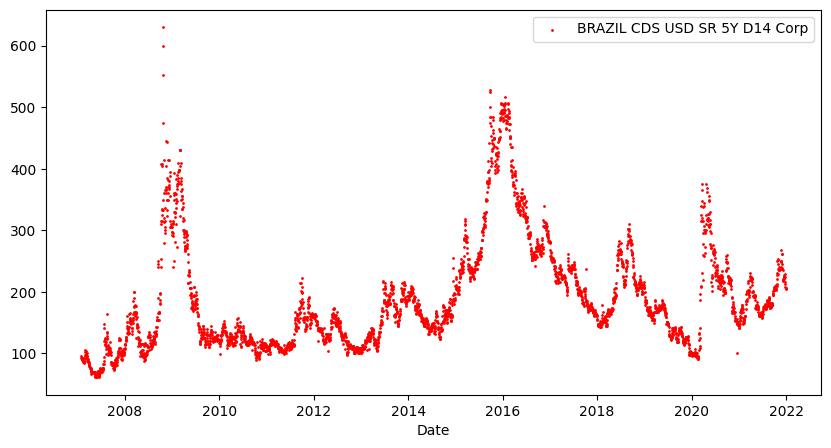

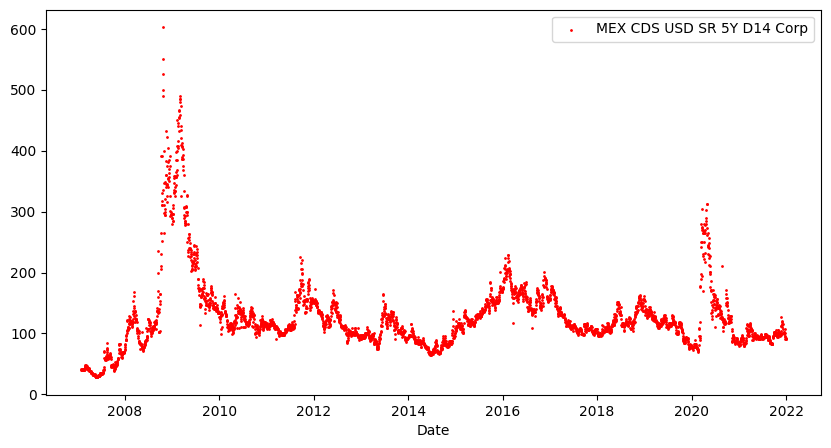

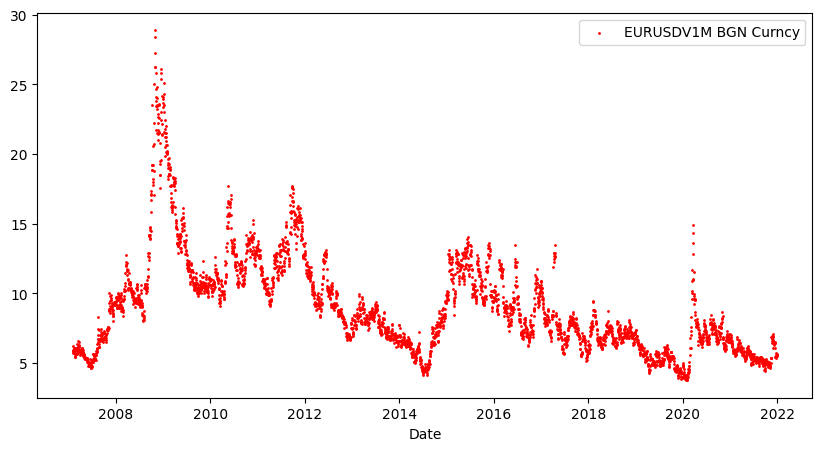

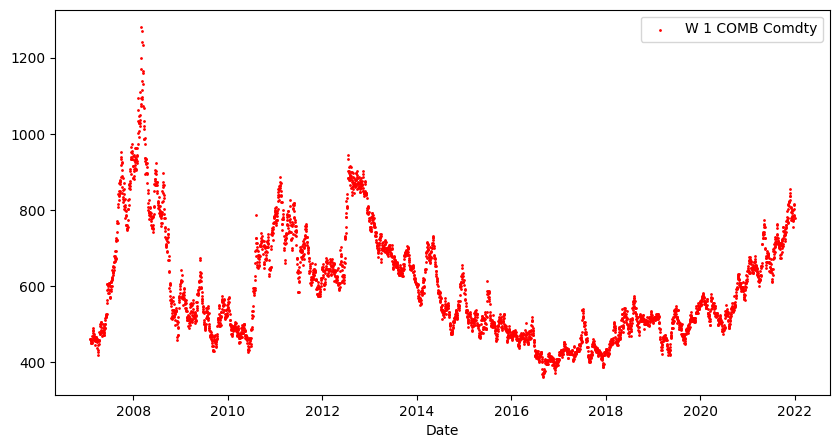

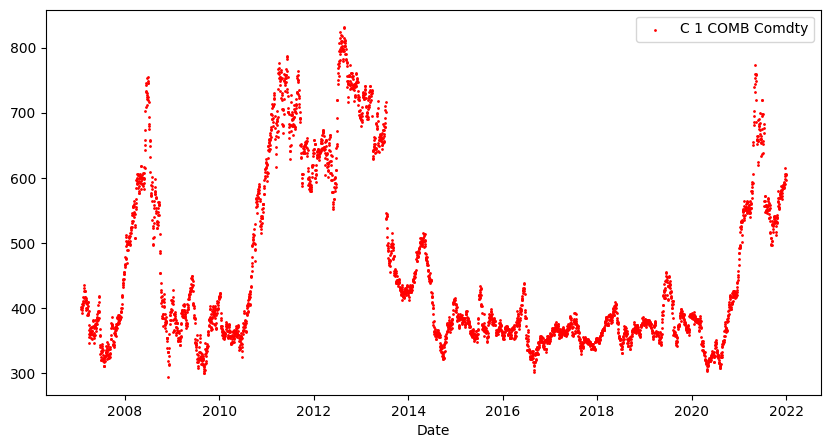

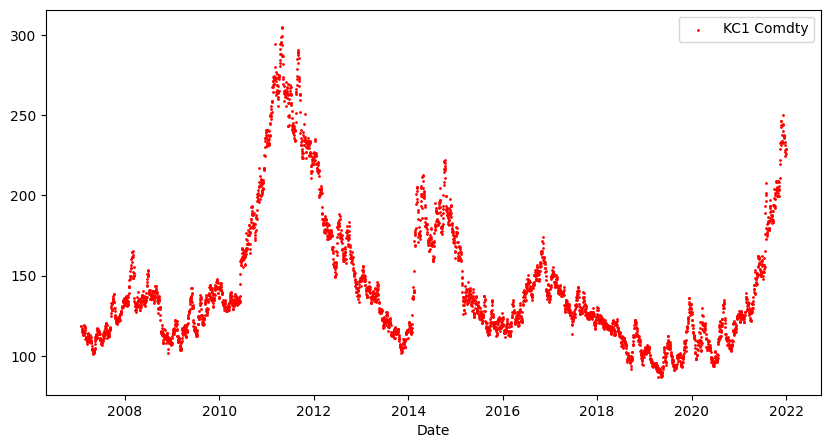

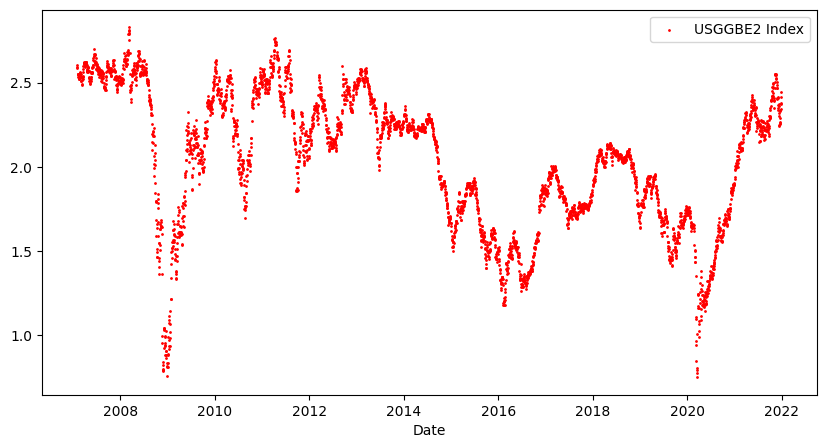

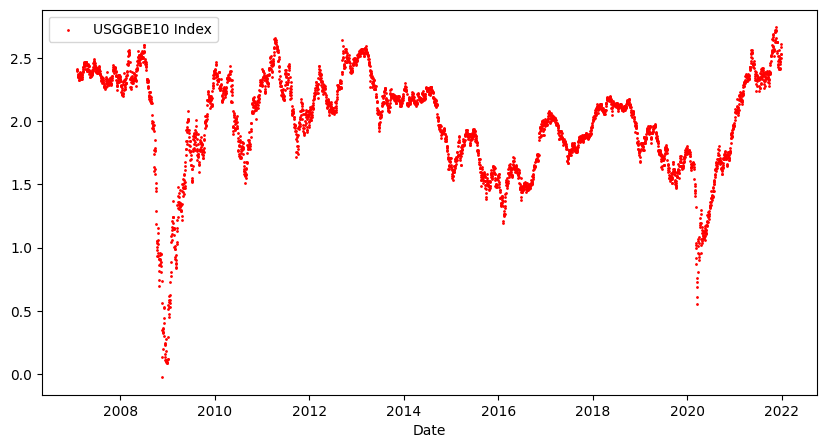

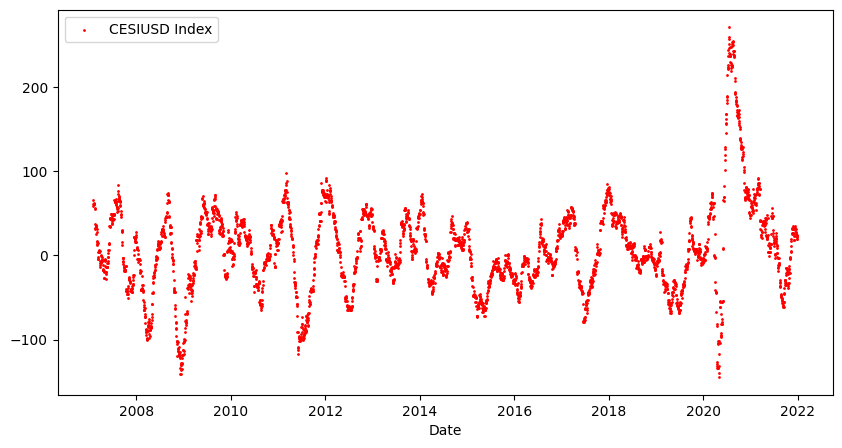

In [11]:
# построение графиков разпределения признаков для различных классов

# Перебор столбцов и построение графиков
for column in t_data.columns:
    if column not in ['Date']:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        axes.scatter(
        x=t_data['Date'],
        y=t_data[column],
        s=1,
        marker='o',
        c = 'red',
        label=column
        );

    
                # Настройка осей и заголовка
        plt.xlabel('Date')
        #axes[0].set_ylabel(column)
        #axes[1].set_ylabel(column)
            
        # Добавление легенды
        axes.legend()
                
                    # Отображение графика
        plt.show()

In [12]:
#вычисление таргета
#t_data['target']=(t_data['devprice']-t_data['devprice'].mean())/t_data['devprice'].std()
t_data['target']=(t_data['devprice']-t_data['devprice'].min())*(10/(t_data['devprice'].max()-t_data['devprice'].min()))-5
#t_data['target'] = np.where(t_data['target'] == -0.0, 0.0, t_data['target'])
new_columns = t_data.columns[:-1].to_list()
new_columns.insert(2, 'target')
t_data = t_data[new_columns]

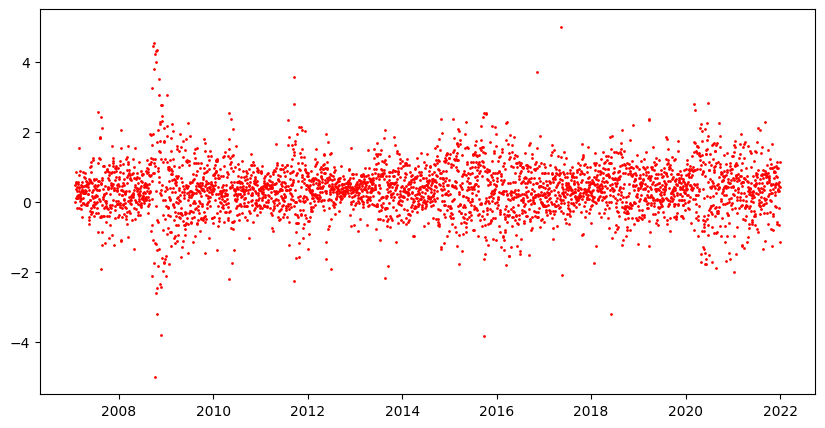

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.scatter(
    x=t_data['Date'],
    y=t_data['target'],
    s=1,
    marker='o',
    c = 'red',
    label=column
);

In [14]:
t_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,3755,2014-07-07 00:49:28.202396928,2007-02-01 00:00:00,2010-10-06 12:00:00,2014-07-07 00:00:00,2018-04-03 12:00:00,2021-12-30 00:00:00,NaN
devprice,3755.0,-0.00007,-0.07924,-0.005884,-0.000054,0.005883,0.068323,0.010827
target,3755.0,0.365137,-5.0,-0.028816,0.366225,0.76858,5.0,0.733717
EURUSD Curncy,3755.0,1.258541,1.0388,1.13435,1.2525,1.3582,1.5991,0.130565
GBPUSD Curncy,3755.0,1.519371,1.1485,1.3276,1.5245,1.61545,2.1075,0.213321
USDJPY Curncy,3755.0,102.798123,75.82,93.77,106.28,111.38,125.63,12.708885
USDMXN Curncy,3755.0,15.582906,9.8581,12.7652,13.8272,19.0268,25.3588,3.618855
USOSFR2 Curncy,3755.0,1.154606,-0.0092,0.2742,0.7157,1.46465,5.4752,1.204237
USOSFR10 Curncy,3755.0,2.329548,0.2612,1.55965,2.1072,2.81925,5.8163,1.130269
CO1 Comdty,3755.0,76.687822,19.99,56.125,71.9,102.905,146.08,25.579646


In [15]:
#выеление тестового набора для сохранения ненормализованных значений
n = len(t_data)
test_df_0 = t_data[int(n*0.8):]

In [16]:
# Преобразование datetime в дни
data_start=t_data['Date'].min()
t_data['Date'] = (t_data['Date'] - data_start).dt.days

In [17]:
#нормализация данных к диапазону от -5 до 5
t_data=t_data.drop('devprice', axis=1)
for column in t_data.columns:
    if column not in ['target']:
        t_data[column]=(t_data[column]-t_data[column].min())*(10/(t_data[column].max()-t_data[column].min()))-5

In [18]:
t_data.describe()

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,...,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,-0.018299,0.365137,-1.078147,-1.132734,0.416206,-1.306744,-2.877971,-1.276669,-0.503385,0.382795,...,-0.007693,-2.761811,-3.259460,-2.895205,-2.464340,-1.949080,-2.358160,1.191390,2.236623,-1.379354
std,2.892080,0.733717,2.330271,2.224411,2.551473,2.334640,2.195750,2.034651,2.028682,1.949508,...,2.647913,1.528968,1.064984,1.418559,1.533853,2.450175,1.907683,1.939460,1.472016,1.257578
min,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,-2.533052,-0.028816,-3.294664,-3.132430,-1.396306,-3.124536,-4.483262,-2.662598,-2.134190,-0.706851,...,-2.265491,-3.880417,-3.792808,-3.899950,-3.618063,-3.726174,-3.639175,-0.258206,1.381417,-2.113625
50%,-0.018362,0.366225,-1.185972,-1.079249,1.115238,-2.439406,-3.678251,-1.676928,-0.883099,0.196821,...,-0.438679,-3.159432,-3.479401,-3.223992,-2.943417,-3.214784,-2.917526,1.445760,2.532538,-1.439576
75%,2.490819,0.768580,0.700518,-0.130865,2.139129,0.915023,-2.312650,-0.395132,1.575859,1.680545,...,2.564824,-2.121918,-3.008855,-2.180687,-1.517954,-0.176662,-1.607102,2.769035,3.333333,-0.657198
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
#разбиение данных
column_indices = {name: i for i, name in enumerate(t_data.columns)}


train_df = t_data[0:int(n*0.6)]
val_df = t_data[int(n*0.6):int(n*0.8)]
test_df = t_data[int(n*0.8):]


In [20]:
#создание класса окна
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [21]:
#сплит с учетом 
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [182]:
def plot(self, model=None, plot_col='target', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot = plot

In [23]:
# создание tf.data.Dataset
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=20,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [24]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
def prediction(self, model=None):
  target_0=model.predict(self.test)
  shape=target_0.shape[0]
  target_p = np.squeeze(target_0)
  df = test_df_0.iloc[(test_df_0.shape[0]-shape):, 0:3]
  df['target_p']=target_p
  df = df[['Date', 'devprice', 'target', 'target_p']]
  df['pnl']=(df['target_p']/5)*df['devprice']
  df['sum']=df["pnl"].cumsum()
  sharp=round((df['sum'].mean()*255**0.5)/df['sum'].std(),1)
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
  axes.bar(
    x=df['Date'],
    height=df['pnl']
  );
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
  axes.bar(
    x=df['Date'],
    height=df['sum']
  );
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
  axes.scatter(
    x=df['Date'],
    y=df['target']
  );
  axes.plot(
    df['Date'],
    df['target_p'],
    color='red'
  );
  
  return df, sharp


WindowGenerator.prediction = prediction

# Одноступенчатые модели

In [26]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['target']

In [27]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (20, 1, 26)
Labels shape (batch, time, features): (20, 1, 1)


In [28]:
#базовый прогноз, озвращает текущую цену в качестве прогноза, прогнозируя «без изменений»
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [29]:
baseline = Baseline(label_index=column_indices['target'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

38/38 [==============================] - 1s 3ms/step - loss: 1.0079 - mean_absolute_error: 0.7470


In [30]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['target'])

wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['target']

In [31]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 30, 1)


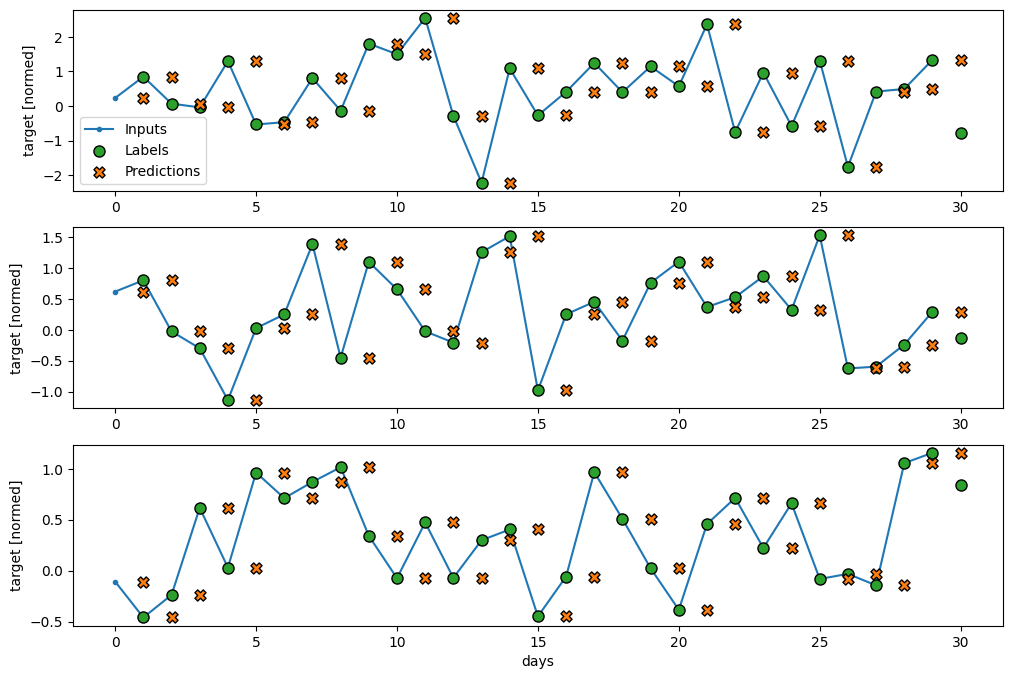

In [183]:
wide_window.plot(baseline)
#это просто метки, сдвинутые вправо на один день
    #Синяя линия Inputs показывает входную температуру на каждом временном шаге. Модель получает все функции, этот график показывает только температуру.
    #Зеленые точки Labels показывают целевое значение прогноза. Эти точки отображаются во время прогнозирования, а не во время ввода. Поэтому диапазон меток смещен на 1 шаг относительно входов.
    #Оранжевые кресты Predictions — это прогнозы модели для каждого выходного временного шага. Если бы модель предсказывала идеально, прогнозы попадали бы прямо в Labels .

38/38 [==============================] - 0s 2ms/step


(           Date  devprice    target  target_p       pnl       sum
 3111 2019-01-04  0.004499  0.674763 -0.597665 -0.000538 -0.000538
 3112 2019-01-07 -0.005172  0.019412  0.281974 -0.000292 -0.000829
 3113 2019-01-08 -0.009103 -0.247019  0.851681 -0.001551 -0.002380
 3114 2019-01-09  0.008258  0.929545  0.619787  0.001024 -0.001356
 3115 2019-01-10  0.000389  0.396253  0.931891  0.000072 -0.001284
 ...         ...       ...       ...       ...       ...       ...
 3885 2021-12-23 -0.008289 -0.191822  0.562496 -0.000932  0.076019
 3887 2021-12-27 -0.000938  0.306319  0.039704 -0.000007  0.076011
 3888 2021-12-28  0.011402  1.142601  0.930488  0.002122  0.078133
 3889 2021-12-29 -0.022419 -1.149354  0.065595 -0.000294  0.077839
 3890 2021-12-30  0.000814  0.425076 -0.370535 -0.000060  0.077779
 
 [750 rows x 6 columns],
 16.8)

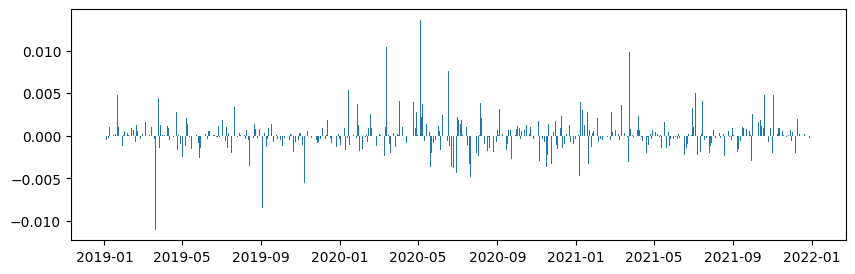

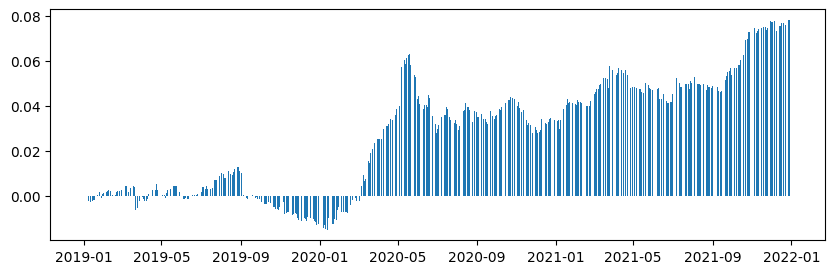

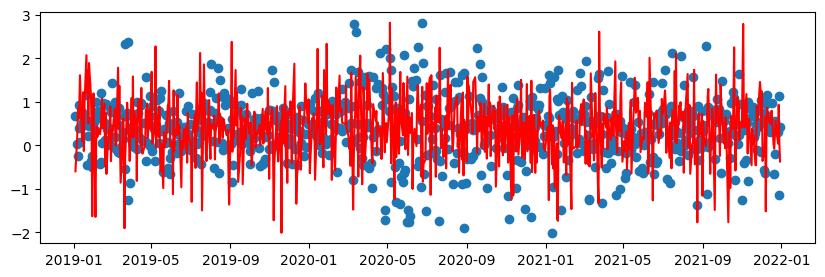

In [217]:
single_step_window.prediction(baseline)

In [38]:
target_bl_0=test_df['target'].shift(-1)

In [39]:
target_bl = np.squeeze(target_bl_0)
df_bl = test_df_0.iloc[1:, 0:3]
df_bl['target_bl']=target_bl
df_bl = df_bl[['Date', 'devprice', 'target', 'target_bl']]
df_bl['pnl']=(df_bl['target_bl']/5)*df_bl['devprice']
df_bl['sum']=df_bl["pnl"].cumsum()
sharp=round((df_bl['sum'].mean()*255**0.5)/df_bl['sum'].std(),1)
print(df_bl, sharp)

           Date  devprice    target  target_bl       pnl       sum
3111 2019-01-04  0.004499  0.674763   0.019412  0.000017  0.000017
3112 2019-01-07 -0.005172  0.019412  -0.247019  0.000256  0.000273
3113 2019-01-08 -0.009103 -0.247019   0.929545 -0.001692 -0.001419
3114 2019-01-09  0.008258  0.929545   0.396253  0.000654 -0.000765
3115 2019-01-10  0.000389  0.396253   0.070137  0.000005 -0.000760
...         ...       ...       ...        ...       ...       ...
3885 2021-12-23 -0.008289 -0.191822   0.306319 -0.000508 -0.057419
3887 2021-12-27 -0.000938  0.306319   1.142601 -0.000214 -0.057633
3888 2021-12-28  0.011402  1.142601  -1.149354 -0.002621 -0.060254
3889 2021-12-29 -0.022419 -1.149354   0.425076 -0.001906 -0.062160
3890 2021-12-30  0.000814  0.425076        NaN       NaN       NaN

[750 rows x 6 columns] -24.7


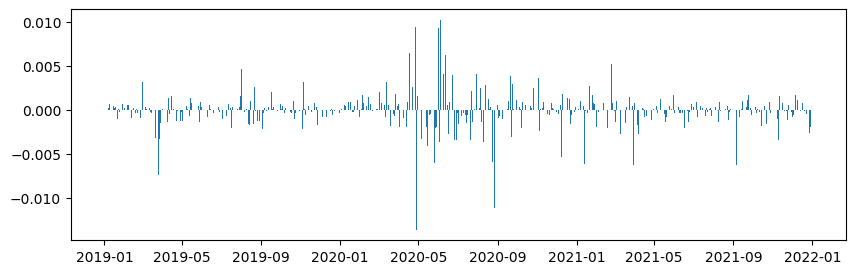

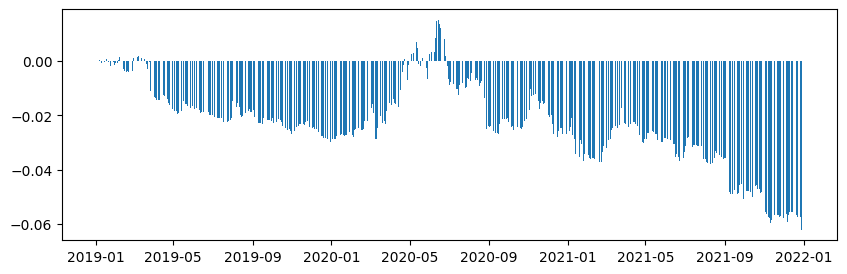

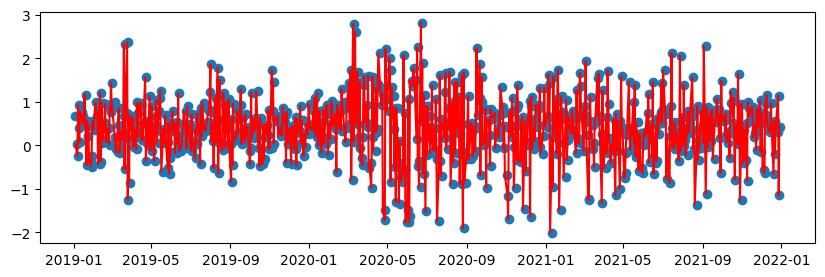

In [186]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
axes.bar(
    x=df_bl['Date'],
    height=df_bl['pnl']
);
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
axes.bar(
    x=df_bl['Date'],
    height=df_bl['sum']
);
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
axes.scatter(
x=df_bl['Date'],
y=df_bl['target']
);
axes.plot(
df_bl['Date'],
df_bl['target_bl'],
color='red'
);

In [41]:
# линейная модель
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])


In [42]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (20, 1, 26)
Output shape: (20, 1, 1)


In [43]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=30):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [225]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 1s 3ms/step - loss: 0.5609 - mean_absolute_error: 0.5258 - val_loss: 0.6559 - val_mean_absolute_error: 0.6209
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5603 - mean_absolute_error: 0.5267 - val_loss: 0.6950 - val_mean_absolute_error: 0.6446
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5640 - mean_absolute_error: 0.5280 - val_loss: 0.6411 - val_mean_absolute_error: 0.6119
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5632 - mean_absolute_error: 0.5280 - val_loss: 0.7186 - val_mean_absolute_error: 0.6590
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5613 - mean_absolute_error: 0.5277 - val_loss: 0.6877 - val_mean_absolute_error: 0.6401
Epoch 6/100
113/113 [==============================] - 0s 3ms/step - loss: 0.5622 - mean_absolute_error: 0.5275 - val_loss: 0.6889 - val_mean_absolute_error: 0.6406
Epoch 7/10

In [219]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 30, 1)


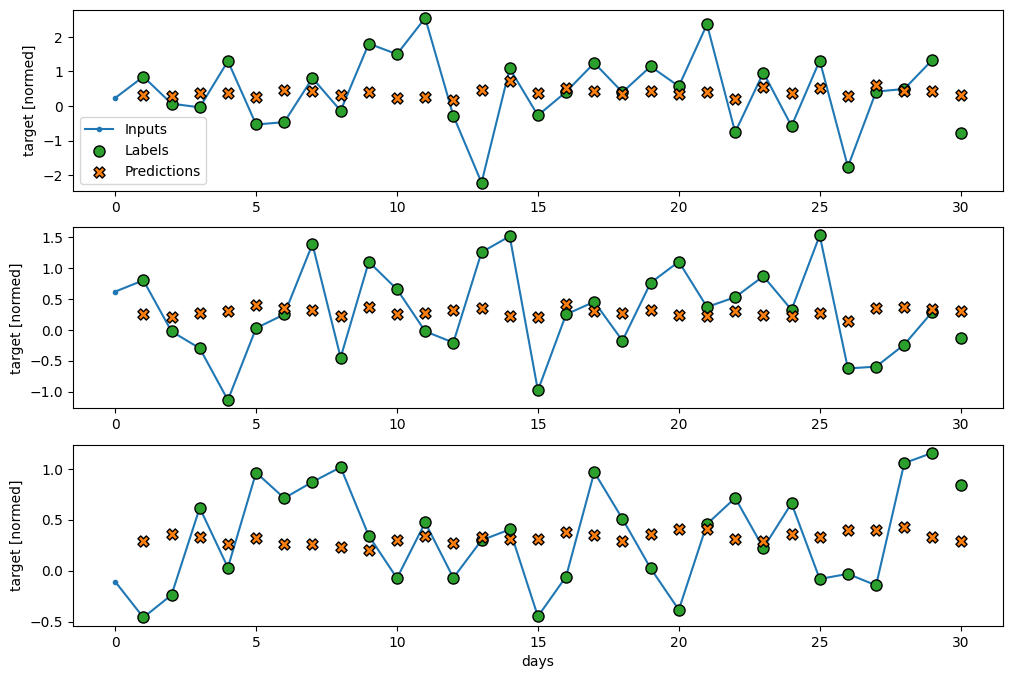

In [220]:
wide_window.plot(linear)


38/38 [==============================] - 0s 2ms/step


(           Date  devprice    target  target_p       pnl       sum
 3111 2019-01-04  0.004499  0.674763  0.114462  0.000103  0.000103
 3112 2019-01-07 -0.005172  0.019412 -0.079567  0.000082  0.000185
 3113 2019-01-08 -0.009103 -0.247019 -0.216101  0.000393  0.000579
 3114 2019-01-09  0.008258  0.929545 -0.139039 -0.000230  0.000349
 3115 2019-01-10  0.000389  0.396253  0.066974  0.000005  0.000354
 ...         ...       ...       ...       ...       ...       ...
 3885 2021-12-23 -0.008289 -0.191822  0.025201 -0.000042 -0.011793
 3887 2021-12-27 -0.000938  0.306319 -0.142952  0.000027 -0.011766
 3888 2021-12-28  0.011402  1.142601  0.090111  0.000205 -0.011560
 3889 2021-12-29 -0.022419 -1.149354 -0.244047  0.001094 -0.010466
 3890 2021-12-30  0.000814  0.425076 -0.391980 -0.000064 -0.010530
 
 [750 rows x 6 columns],
 -23.0)

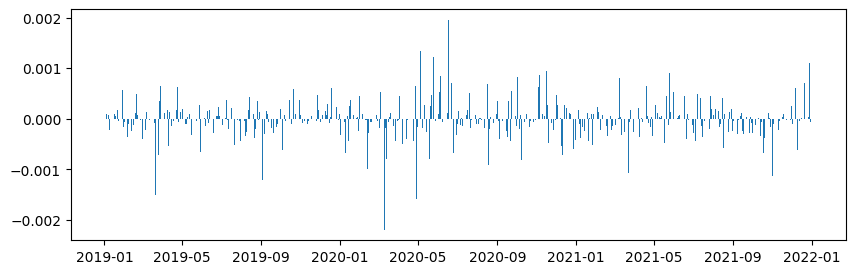

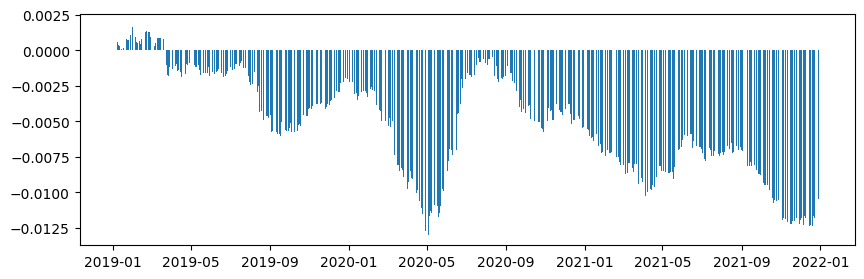

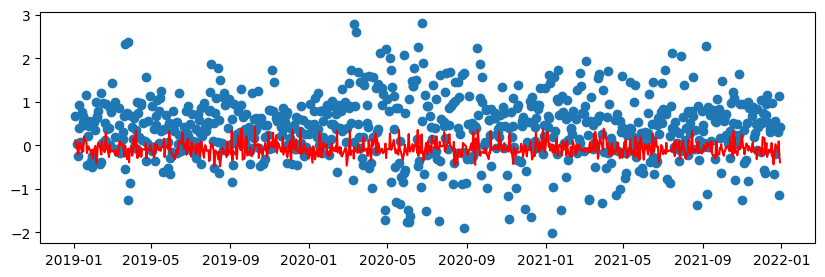

In [224]:
single_step_window.prediction(linear)

In [ ]:
# плотный слой

In [229]:
CONV_WIDTH = 30
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['target'])

conv_window


Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30]
Label column name(s): ['target']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

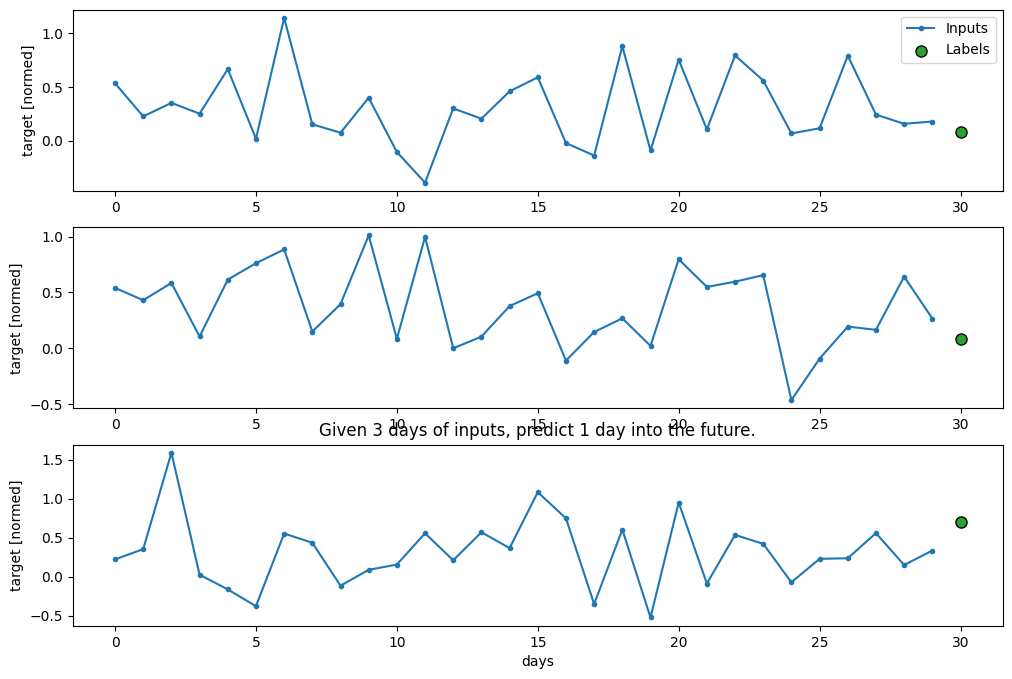

In [230]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

In [231]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])


In [232]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 1, 1)


In [233]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)


Epoch 1/100
112/112 [==============================] - 1s 4ms/step - loss: 0.8292 - mean_absolute_error: 0.6355 - val_loss: 0.4966 - val_mean_absolute_error: 0.5222
Epoch 2/100
112/112 [==============================] - 1s 5ms/step - loss: 0.5973 - mean_absolute_error: 0.5495 - val_loss: 0.5092 - val_mean_absolute_error: 0.5317
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 0.5842 - mean_absolute_error: 0.5349 - val_loss: 0.4746 - val_mean_absolute_error: 0.5119
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 0.5796 - mean_absolute_error: 0.5341 - val_loss: 0.4714 - val_mean_absolute_error: 0.5099
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 0.5726 - mean_absolute_error: 0.5291 - val_loss: 0.4829 - val_mean_absolute_error: 0.5181
Epoch 6/100
112/112 [==============================] - 0s 3ms/step - loss: 0.5755 - mean_absolute_error: 0.5320 - val_loss: 0.4775 - val_mean_absolute_error: 0.5094
Epoch 7/10

In [193]:
from IPython.display import clear_output

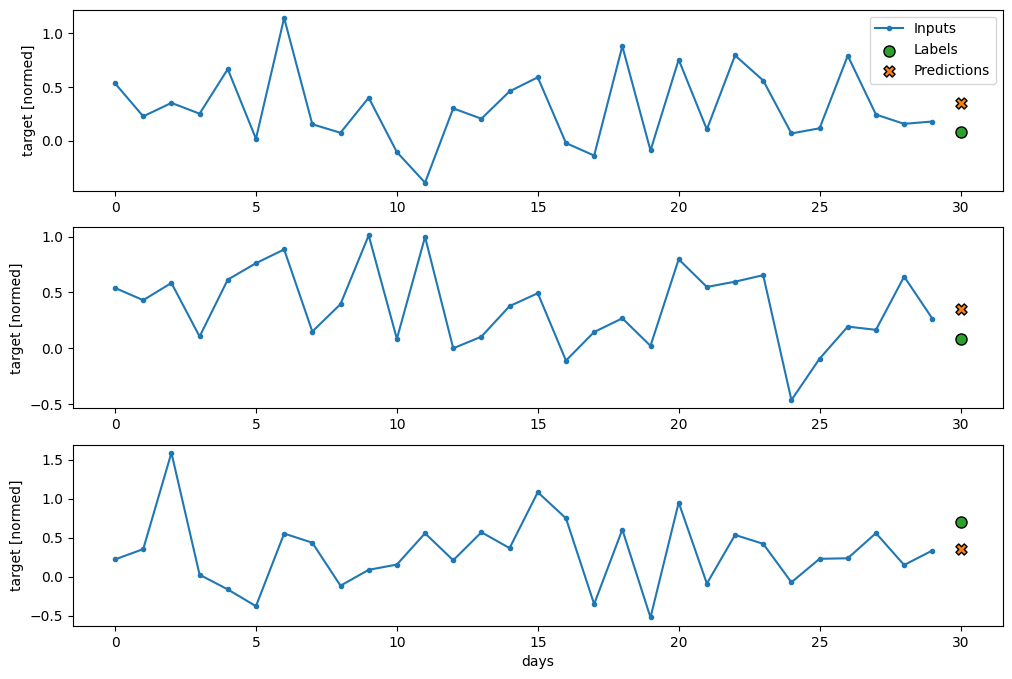

In [234]:
conv_window.plot(multi_step_dense)


In [235]:
test_window = WindowGenerator(
    input_width=30, label_width=1, shift=1,
    label_columns=['target'])

37/37 [==============================] - 0s 1ms/step


(           Date  devprice    target  target_p       pnl       sum
 3140 2019-02-14 -0.004841  0.041828 -0.287079  0.000278  0.000278
 3141 2019-02-15  0.008962  0.977206 -0.101607 -0.000182  0.000096
 3142 2019-02-18 -0.003788  0.113200 -0.368292  0.000279  0.000375
 3143 2019-02-19  0.002145  0.515255 -1.796640 -0.000771 -0.000396
 3144 2019-02-20  0.008475  0.944236 -1.603858 -0.002719 -0.003114
 ...         ...       ...       ...       ...       ...       ...
 3885 2021-12-23 -0.008289 -0.191822 -1.960351  0.003250 -0.137231
 3887 2021-12-27 -0.000938  0.306319 -0.279998  0.000053 -0.137178
 3888 2021-12-28  0.011402  1.142601 -0.963277 -0.002197 -0.139375
 3889 2021-12-29 -0.022419 -1.149354 -0.938967  0.004210 -0.135165
 3890 2021-12-30  0.000814  0.425076 -2.618941 -0.000426 -0.135591
 
 [721 rows x 6 columns],
 -13.0)

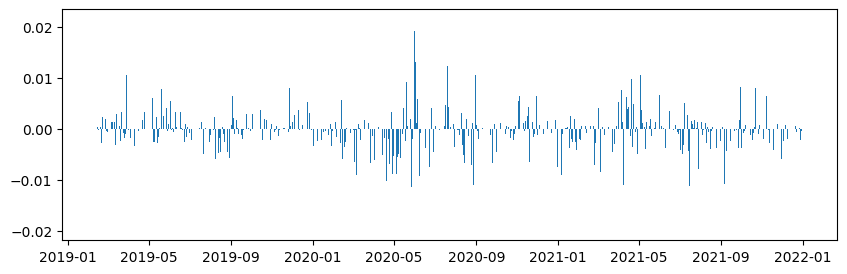

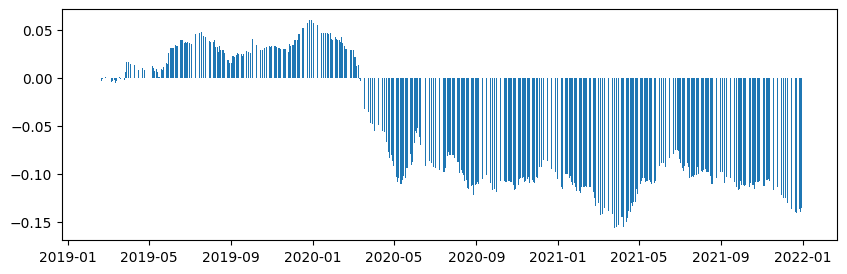

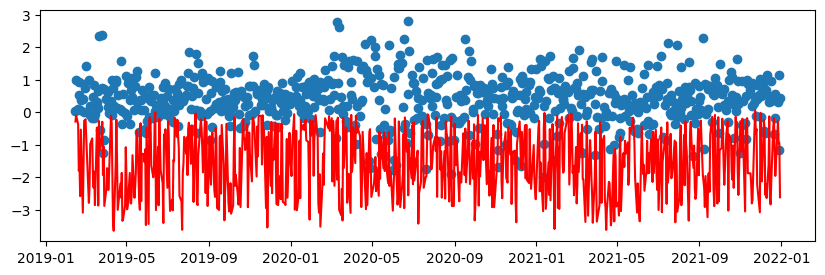

In [236]:
test_window.prediction(multi_step_dense)

In [237]:
#сверточная нейронная сеть
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=25,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


In [238]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (20, 30, 26)
Output shape: (20, 1, 1)


In [241]:
history = compile_and_fit(conv_model, conv_window)

#IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)


Epoch 1/100
112/112 [==============================] - 2s 6ms/step - loss: 0.5684 - mean_absolute_error: 0.5287 - val_loss: 0.4633 - val_mean_absolute_error: 0.5058
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.5641 - mean_absolute_error: 0.5275 - val_loss: 0.4647 - val_mean_absolute_error: 0.5071
Epoch 3/100
112/112 [==============================] - 1s 4ms/step - loss: 0.5670 - mean_absolute_error: 0.5268 - val_loss: 0.4667 - val_mean_absolute_error: 0.5089
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 0.5639 - mean_absolute_error: 0.5254 - val_loss: 0.4712 - val_mean_absolute_error: 0.5103
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 0.5663 - mean_absolute_error: 0.5273 - val_loss: 0.4647 - val_mean_absolute_error: 0.5071
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 0.5631 - mean_absolute_error: 0.5256 - val_loss: 0.4656 - val_mean_absolute_error: 0.5078
Epoch 7/10

In [242]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)


Wide window
Input shape: (20, 30, 26)
Labels shape: (20, 30, 1)
Output shape: (20, 1, 1)


In [243]:
LABEL_WIDTH = 30
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['target'])

wide_conv_window

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): ['target']

In [244]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (20, 59, 26)
Labels shape: (20, 30, 1)
Output shape: (20, 30, 1)


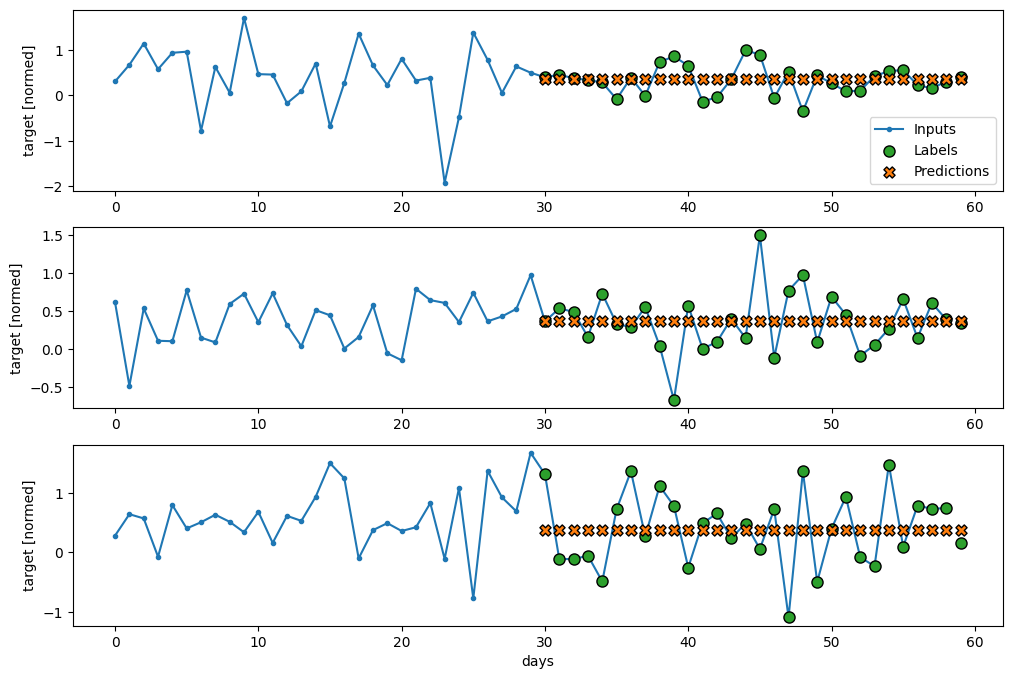

In [245]:
wide_conv_window.plot(conv_model)


37/37 [==============================] - 0s 2ms/step


(           Date  devprice    target  target_p       pnl       sum
 3140 2019-02-14 -0.004841  0.041828  1.221181 -0.001182 -0.001182
 3141 2019-02-15  0.008962  0.977206  0.943365  0.001691  0.000508
 3142 2019-02-18 -0.003788  0.113200  0.707765 -0.000536 -0.000028
 3143 2019-02-19  0.002145  0.515255  0.657258  0.000282  0.000254
 3144 2019-02-20  0.008475  0.944236  1.043186  0.001768  0.002022
 ...         ...       ...       ...       ...       ...       ...
 3885 2021-12-23 -0.008289 -0.191822  1.735712 -0.002877  0.055093
 3887 2021-12-27 -0.000938  0.306319  0.708803 -0.000133  0.054960
 3888 2021-12-28  0.011402  1.142601  1.234568  0.002815  0.057775
 3889 2021-12-29 -0.022419 -1.149354  0.517984 -0.002322  0.055453
 3890 2021-12-30  0.000814  0.425076  0.844289  0.000137  0.055590
 
 [721 rows x 6 columns],
 26.4)

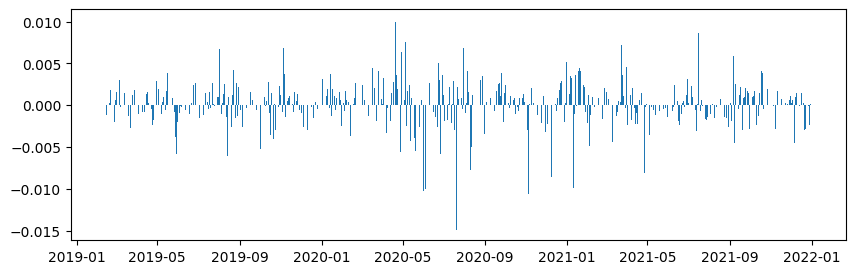

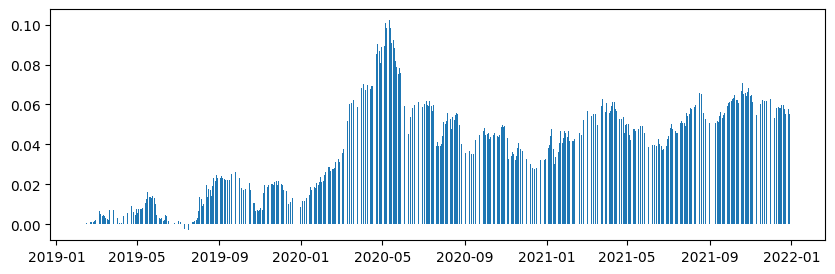

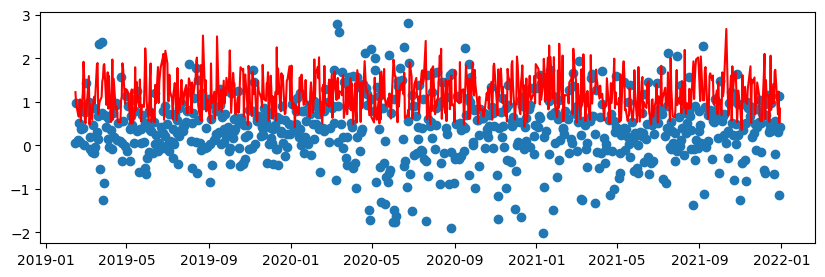

In [246]:
test_window.prediction(conv_model)

In [247]:
#рекуррентная нейронная сеть lstm
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(25, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [248]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 30, 1)


In [249]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


Epoch 1/100
112/112 [==============================] - 5s 19ms/step - loss: 0.5913 - mean_absolute_error: 0.5422 - val_loss: 0.5226 - val_mean_absolute_error: 0.5494
Epoch 2/100
112/112 [==============================] - 2s 15ms/step - loss: 0.5370 - mean_absolute_error: 0.5151 - val_loss: 0.5042 - val_mean_absolute_error: 0.5373
Epoch 3/100
112/112 [==============================] - 2s 14ms/step - loss: 0.5178 - mean_absolute_error: 0.5077 - val_loss: 0.5056 - val_mean_absolute_error: 0.5372
Epoch 4/100
112/112 [==============================] - 2s 16ms/step - loss: 0.5058 - mean_absolute_error: 0.5028 - val_loss: 0.5019 - val_mean_absolute_error: 0.5362
Epoch 5/100
112/112 [==============================] - 2s 15ms/step - loss: 0.4938 - mean_absolute_error: 0.4985 - val_loss: 0.5138 - val_mean_absolute_error: 0.5422
Epoch 6/100
112/112 [==============================] - 2s 15ms/step - loss: 0.4817 - mean_absolute_error: 0.4946 - val_loss: 0.5107 - val_mean_absolute_error: 0.5358
Epoc

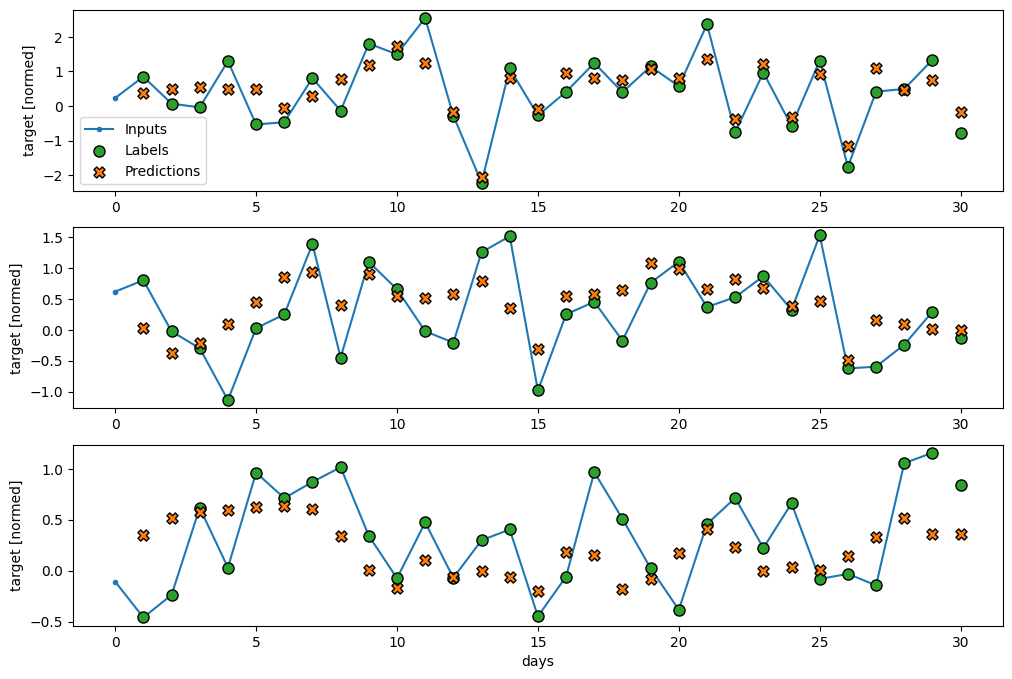

In [250]:
wide_window.plot(lstm_model)


38/38 [==============================] - 1s 2ms/step


(           Date  devprice    target  target_p       pnl       sum
 3111 2019-01-04  0.004499  0.674763 -1.741579 -0.001567 -0.001567
 3112 2019-01-07 -0.005172  0.019412 -0.928553  0.000960 -0.000606
 3113 2019-01-08 -0.009103 -0.247019 -0.634586  0.001155  0.000549
 3114 2019-01-09  0.008258  0.929545 -1.130580 -0.001867 -0.001318
 3115 2019-01-10  0.000389  0.396253 -1.357957 -0.000106 -0.001424
 ...         ...       ...       ...       ...       ...       ...
 3885 2021-12-23 -0.008289 -0.191822 -0.974562  0.001616 -0.078959
 3887 2021-12-27 -0.000938  0.306319 -1.372624  0.000258 -0.078701
 3888 2021-12-28  0.011402  1.142601 -0.679005 -0.001548 -0.080249
 3889 2021-12-29 -0.022419 -1.149354 -2.016560  0.009042 -0.071208
 3890 2021-12-30  0.000814  0.425076 -0.817142 -0.000133 -0.071341
 
 [750 rows x 6 columns],
 -20.1)

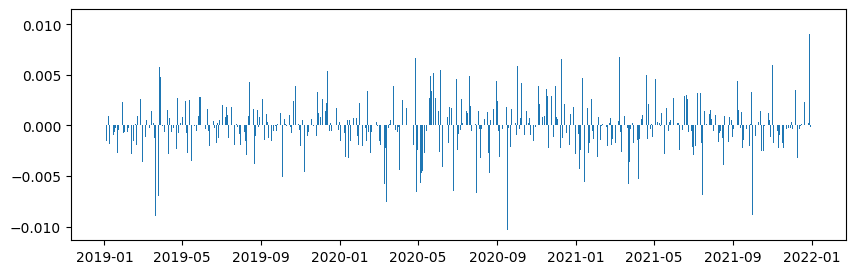

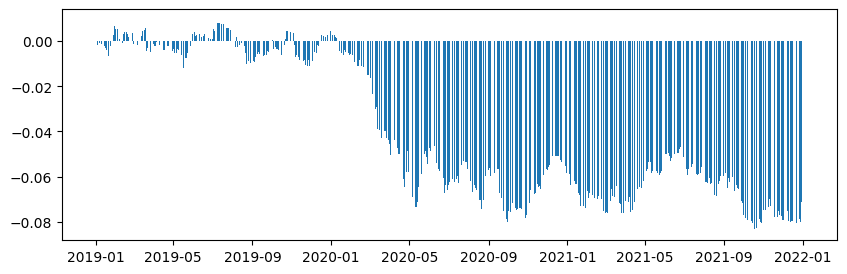

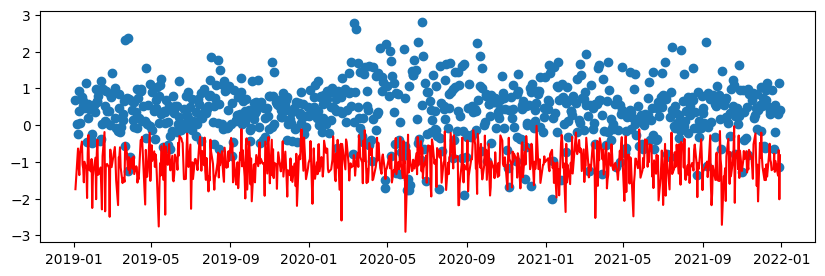

In [253]:
single_step_window.prediction(lstm_model)

In [ ]:
test_window = WindowGenerator(
    input_width=7, label_width=1, shift=1,
    label_columns=['target'])
target_rnn_0=conv_model.predict(test_window.test)
target_rnn_0.shape

38/38 [==============================] - 0s 2ms/step


(744, 1, 1)

In [ ]:
target_rnn = np.squeeze(target_rnn_0)
df_rnn = test_df_0.iloc[7:, 0:3]
df_rnn['target_rnn']=target_rnn
df_rnn = df_rnn[['Date', 'devprice', 'target', 'target_rnn']]
df_rnn['pnl']=(df_rnn['target_rnn']/5)*df_rnn['devprice']
df_rnn['sum']=df_rnn["pnl"].cumsum()
sharp=(df_rnn['sum'].mean()*255**0.5)/df_rnn['sum'].std()
print(df_rnn, sharp)

           Date  devprice    target  target_rnn       pnl       sum
3117 2019-01-14  0.005943  0.772646    1.948036  0.002315  0.002315
3118 2019-01-15  0.004417  0.669242    1.069918  0.000945  0.003261
3119 2019-01-16  0.002390  0.531850    0.910412  0.000435  0.003696
3120 2019-01-17  0.002175  0.517264    2.008207  0.000873  0.004569
3121 2019-01-18  0.001453  0.468379    0.700889  0.000204  0.004773
...         ...       ...       ...         ...       ...       ...
3885 2021-12-23 -0.008289 -0.191822    0.698083 -0.001157  0.042017
3887 2021-12-27 -0.000938  0.306319    1.831257 -0.000344  0.041673
3888 2021-12-28  0.011402  1.142601    0.932139  0.002126  0.043799
3889 2021-12-29 -0.022419 -1.149354    0.507147 -0.002274  0.041525
3890 2021-12-30  0.000814  0.425076    0.477882  0.000078  0.041603

[744 rows x 6 columns] 20.336793129548482


In [ ]:
#Performance

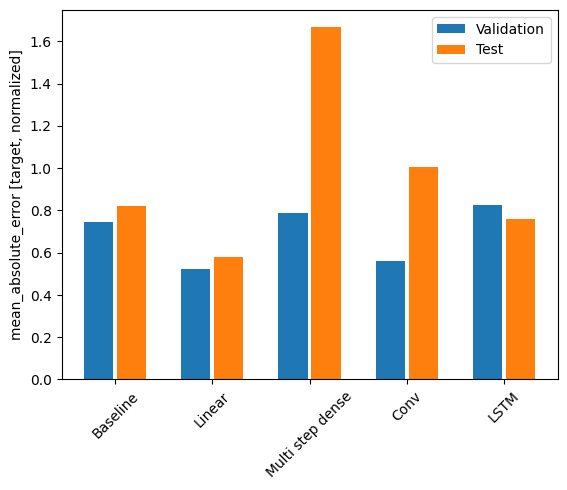

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [target, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')


Baseline    : 0.8219
Linear      : 0.5782
Multi step dense: 1.6654
Conv        : 1.0058
LSTM        : 0.7589
